#**하나의 층에 여러 개의 뉴런**

하나의 층에 여러 뉴런을 사용하게 되면 입력층에서 전달되는 특성이 각 뉴런에 모두 전달된다.   
>세 개의 특성$(x_1,\, x_2,\, x_3)$과 두 개의 뉴런이 있는 경우를 가정하자.
 - 세 개의 특성은 두 개의 뉴런에 모두 전달되어 $(z_1,\, z_2)$를 출력한다.

$z_1$을 계산할 때 $(x_1,\, x_2,\, x_3)$와 곱해질 가중치 3개가 필요하고,   
$z_2$도 마찬가지로 3개의 가중치가 필요하다.   
또한 각 뉴런마다 계산될 절편이 하나씩 필요하다.

###$$
  x_1w_{11} + x_2w_{21} + x_3w_{31} + b_1 = z_1 \\
  x_1w_{12} + x_2w_{22} + x_3w_{32} + b_2 = z_2 \\
$$
###$$
  \begin{bmatrix}
    x_1 & x_2 & x_3
  \end{bmatrix}
  \begin{bmatrix}
    w_{11} & w_{12} \\
    w_{21} & w_{22} \\
    w_{31} & w_{32} \\
  \end{bmatrix}
  +
  \begin{bmatrix}
    b_1 \\ b_2
  \end{bmatrix}
  =
  \begin{bmatrix}
    z_1 & z_2
  \end{bmatrix}
$$


출력$(z_n)$은 (1, 2) 크기의 행렬이다.   
중요한 점은 여러 개의 뉴런을 사용함으로써 가중치가 1열이 아닌   
2차원 행렬로 나온다는 것이다.

여기 예에서 사용된 가중치 행렬은 (3, 2) 크기이고 아래 표와 같이 해석할 수 있다.   

| |첫 번째 특성에 대한$(x_1)$|두 번째 특성에 대한$(x_2)$|세 번째 특성에 대한$(x_3)$|
|:-:|:-------------------:|:-------------------:|:-------------------:|
|첫 번째 뉴런 가중치|$w_{11}$|$w_{21}$|$w_{31}$|
|두 번째 뉴런 가중치|$w_{12}$|$w_{22}$|$w_{32}$|

<br>

>**가중치 행렬의 크기는 (입력의 개수, 출력의 개수)이다.**

여기서는 3개의 특성(입력), 2개의 뉴런(출력)이므로, 가중치 행렬의 크기는 (3, 2)라고 볼 수 있다.   
만일 한 개의 뉴런만 이용할 경우, 3개의 특성, 1개의 뉴런이므로 가중치 행렬의 크기는 열벡터가 될 것이다.   
위의 식은 샘플 1개(샘플 1개에 있는 3개의 특성)에 대한 것이다.   
샘플 전체에 대한 식은

###$$
  𝑋𝑊_1 + 𝑏_1 = 𝑍_1
$$
이때 $𝑊_1$은 첫 번째 층의 가중치 행렬이다.   
이후에 나올 두 번째 층의 가중치 행렬은 $𝑊_2$라고 쓴다.

#**출력 모으기**

우리가 해결할 문제는 이진 분류 문제이므로   
각 뉴런에서 출력된 값$(z_1,\, z_2,\, …)$을 하나의 뉴런으로 다시 모아야 한다.   

하지만 1개의 샘플에 있는 여러 특성값을 뉴런에 통과시키면 여러 개의 출력값이 나오는데   
이 값들 중 하나만 골라 이진분류에 사용할 수는 없으므로,   
이진분류를 수행할 기준값(z)를 만들어야 한다.

각 뉴런 출력값을 $(z_1,\, z_2)$라고 하고, 이를 활성화 함수에 통과시켜 얻은 **'활성화 출력'**을 $(a_1,\, a_2)$라고 표현하겠다.   
이 두 활성화 출력이 마지막 뉴런에 입력되고 마지막 뉴런의 절편이 더해져 최종 출력인 z가 만들어진다.

###$$
  a_1w_1 + a_2w_2 + b_2 = z \quad (선형 방정식) \\
  \begin{bmatrix}
    a_1 & a_2
  \end{bmatrix}
  \begin{bmatrix}
    w_1 \\ w_2
  \end{bmatrix}
  + b_2 = z \quad (행렬곱셈)
$$

위의 식은 샘플 1개에 대한 것이고, 샘플 전체에 대한 식은 아래와 같다
###$$
  𝐴_1𝑊_2 + 𝑏_2 = 𝑍_2
$$

행렬 $𝐴_1$의 크기는 (전체 샘플 수, 2)이므로, (m, 2)이고,   
$𝑊_2$의 크기는 (입력 개수, 출력 개수)이므로 (2, 1)이다.
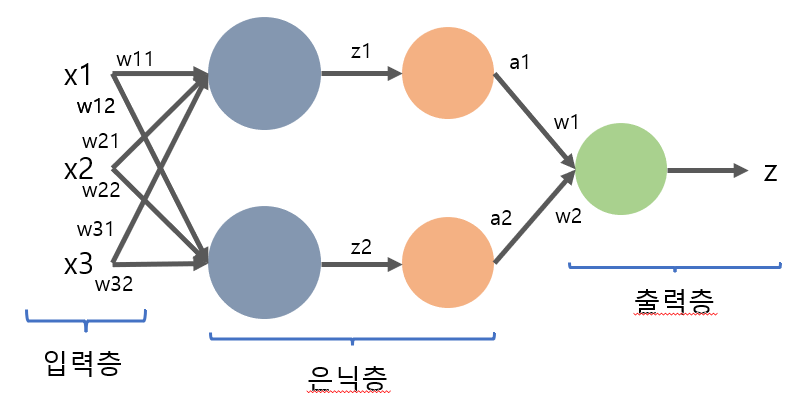

##**다층 신경망에서 주의할 점**

###**한 층의 활성화 함수는 같아야 한다.**
각 층은 한 개 이상의 뉴런을 가지는데, 은닉층과 출력층에 있는 모든 뉴런에는 활성화 함수가 필요하다.   
이때 같은 층에 있는 뉴런은 모두 같은 활성화 함수를 사용해야 한다.

###**완전 연결 신경망**
위의 신경망은 입력층, 은닉층, 출력층 사이의 모든 뉴런들이 서로 연결되어 있기 때문에   
**'완전 연결(fully-connected) 신경망'**이라고 한다.